In [1]:
from google.colab import drive
from google.colab import files
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

!pip install split-folders
import splitfolders

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
local_zip = '/content/drive/MyDrive/DATASET/tumorbrain.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/braintumor')
zip_ref.close()

In [4]:
base_dir = '/content/braintumor'
splitfolders.ratio(base_dir, output='/content/braintumor', seed=1337,ratio=(.6,.4))
train_dir = os.path.join('/content/braintumor', 'train')
validation_dir = os.path.join('/content/braintumor','val')

Copying files: 3064 files [00:02, 1296.11 files/s]


In [5]:
train_dir = '/content/braintumor/train'
validation_dir = '/content/braintumor/val'

Selanjutnya, kami akan menampilkan list folder apa saja yang ada didalam setiap direktori train maupun val, berikut hasilnya

In [6]:
os.listdir('/content/braintumor/train')

['3', '1', '2']

In [7]:
os.listdir('/content/braintumor/val')

['3', '1', '2']

# **PREPROCESSING DATA DAN AUGMENTASI DATA**

In [8]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255 )

train_generator = train_datagen.flow_from_directory(
            train_dir,
            target_size=(150, 150),
            batch_size=4,
            class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
            validation_dir,
            target_size=(150, 150),
            batch_size=4,
            class_mode='categorical')

Found 1837 images belonging to 3 classes.
Found 1227 images belonging to 3 classes.


# **PEMBUATAN ARSITEKTUR MODEL MENGGUNAKAN ALGORITMA CONVOLUTIONAL NEURAL NETWORK (CNN)**

In [9]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=64,
                              kernel_size= 3,
                              activation="relu",
                              input_shape=(150, 150, 3)),
        tf.keras.layers.Conv2D(32, 3, activation="relu"),
        tf.keras.layers.MaxPool2D(pool_size=2,
                                  padding="valid"),
        tf.keras.layers.Conv2D(32, 3, activation="relu"),
        tf.keras.layers.Conv2D(32, 3, activation="relu"),
        tf.keras.layers.MaxPool2D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 32)      18464     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 34, 34, 32)        0         
 g2D)                                                   

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [11]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nAkurasi telah mencapai >95%!")
      self.model.stop_training= True
callbacks=myCallback()

# **MODEL TESTING**

In [12]:
h= model.fit(train_generator,
              epochs=30,
             callbacks=[callbacks],
              steps_per_epoch=len(train_generator))

Epoch 1/30
460/460 [==============================] - 42s 76ms/step - loss: 0.7291 - accuracy: 0.6674
Epoch 2/30
460/460 [==============================] - 38s 82ms/step - loss: 0.5593 - accuracy: 0.7431
Epoch 3/30
460/460 [==============================] - 36s 78ms/step - loss: 0.4944 - accuracy: 0.7964
Epoch 4/30
460/460 [==============================] - 33s 71ms/step - loss: 0.4095 - accuracy: 0.8291
Epoch 5/30
460/460 [==============================] - 35s 77ms/step - loss: 0.3744 - accuracy: 0.8410
Epoch 6/30
460/460 [==============================] - 33s 71ms/step - loss: 0.3248 - accuracy: 0.8710
Epoch 7/30
460/460 [==============================] - 34s 73ms/step - loss: 0.2843 - accuracy: 0.8764
Epoch 8/30
460/460 [==============================] - 32s 70ms/step - loss: 0.2617 - accuracy: 0.8895
Epoch 9/30
460/460 [==============================] - 34s 73ms/step - loss: 0.2453 - accuracy: 0.8977
Epoch 10/30
460/460 [==============================] - 34s 73ms/step - loss: 0.217

# **MODEL EVALUATION**

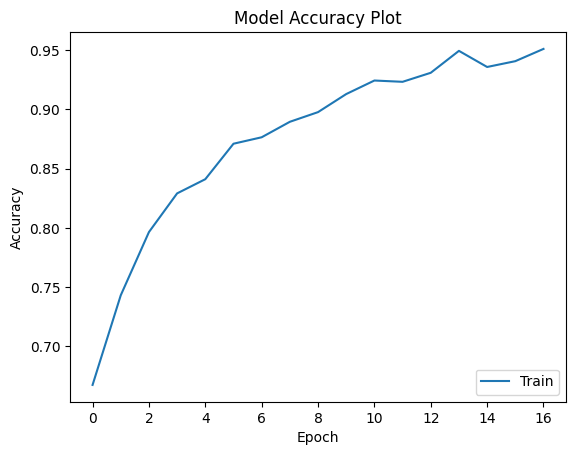

In [13]:
plt.plot(h.history['accuracy'])
plt.title('Model Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

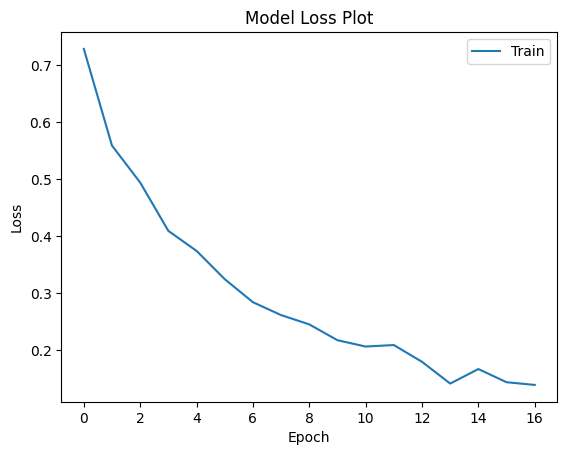

In [14]:
plt.plot(h.history['loss'])
plt.title('Model Loss Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

# **PENGAPLIKASIAN**

Saving 941.png to 941.png
1/1 [==============================] - 0s 123ms/step
941.png


		 SISTEM MENDETEKSI TERDAPAT TUMOR OTAK JENIS PITUITARY DALAM HASIL MRI


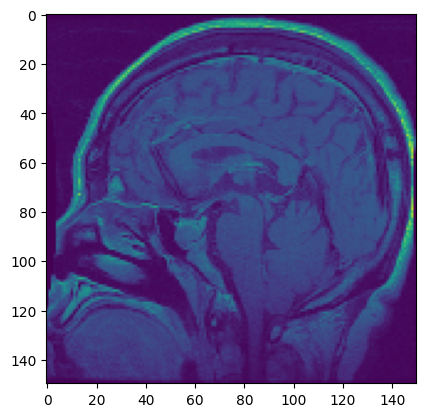

In [15]:
uploaded = files.upload()

for fn in uploaded.keys():
      path = fn
      img = image.load_img(path, target_size=(150,150))

      imgplot = plt.imshow(img)
      x = image.img_to_array(img)
      x = np.expand_dims(x, axis=0)
      images = np.vstack([x])

      classes = model.predict(images, batch_size=10)
      print(fn)
      if classes[0,0]!=0:
       print('\n\n\t\t SISTEM MENDETEKSI TERDAPAT TUMOR OTAK JENIS MENINGIOMA DALAM HASIL MRI')
      elif classes[0,1]!=0:
       print('\n\n\t\t SISTEM MENDETEKSI TERDAPAT TUMOR OTAK JENIS GLIOMA DALAM HASIL MRI')
      elif classes[0,2]!=0:
        print('\n\n\t\t SISTEM MENDETEKSI TERDAPAT TUMOR OTAK JENIS PITUITARY DALAM HASIL MRI')


In [16]:
model.save('tumor-brain.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
